
Load and Prepare Data

In [2]:
import os
import sys
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae
sys.path.append('../src')
from data_loader import load_data

# Load preprocessed data
ratings, movies, df = load_data()

# Surprise needs specific format
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

Looking for data in: e:\recommendation\data


Train the Model and Predict

In [3]:
model = SVD()
model.fit(trainset)

predictions = model.test(testset)

Evaluate

In [4]:
# Root Mean Squared Error
rmse(predictions)

# Mean Absolute Error
mae(predictions)

RMSE: 0.8663
MAE:  0.6700


0.6700207375769788

Model: SVD (default hyperparameters)
Train-Test split: 80-20 
RMSE: 0.8663
MAE:  0.6700

These metrics suggest that on average:

The predicted ratings differ from actual ratings by ~0.67 stars (MAE),

And the typical squared error is <1 star, which is common in collaborative filtering setups.

This performance is typical for SVD on MovieLens without tuning.

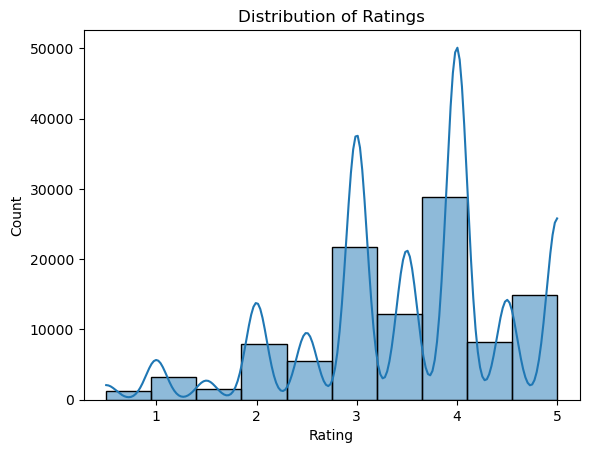

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of actual ratings
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Visualize Prediction Errors

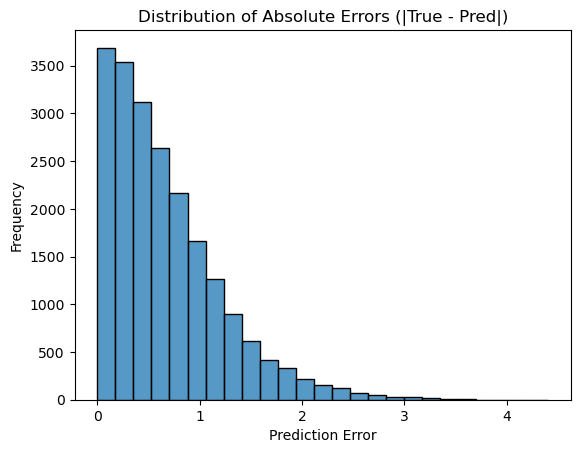

In [6]:
errors = [abs(pred.r_ui - pred.est) for pred in predictions]

sns.histplot(errors, bins=25)
plt.title("Distribution of Absolute Errors (|True - Pred|)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()